In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

<h3> Data Collection </h3> 

In [2]:
basic_addmision_df = pd.read_csv("../Dataset/Admission_predict_ver1.1.csv")
print(basic_addmision_df.head(5))
print(len(basic_addmision_df['Serial No.']))

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
500


<h3> Exploratory Analysis </h3>

In [3]:
basic_addmision_df = basic_addmision_df.rename(columns = {'Serial No.': 'Serial_No'})
basic_addmision_df = basic_addmision_df.drop(['Serial_No'], axis = 1)
corr_matrix = basic_addmision_df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


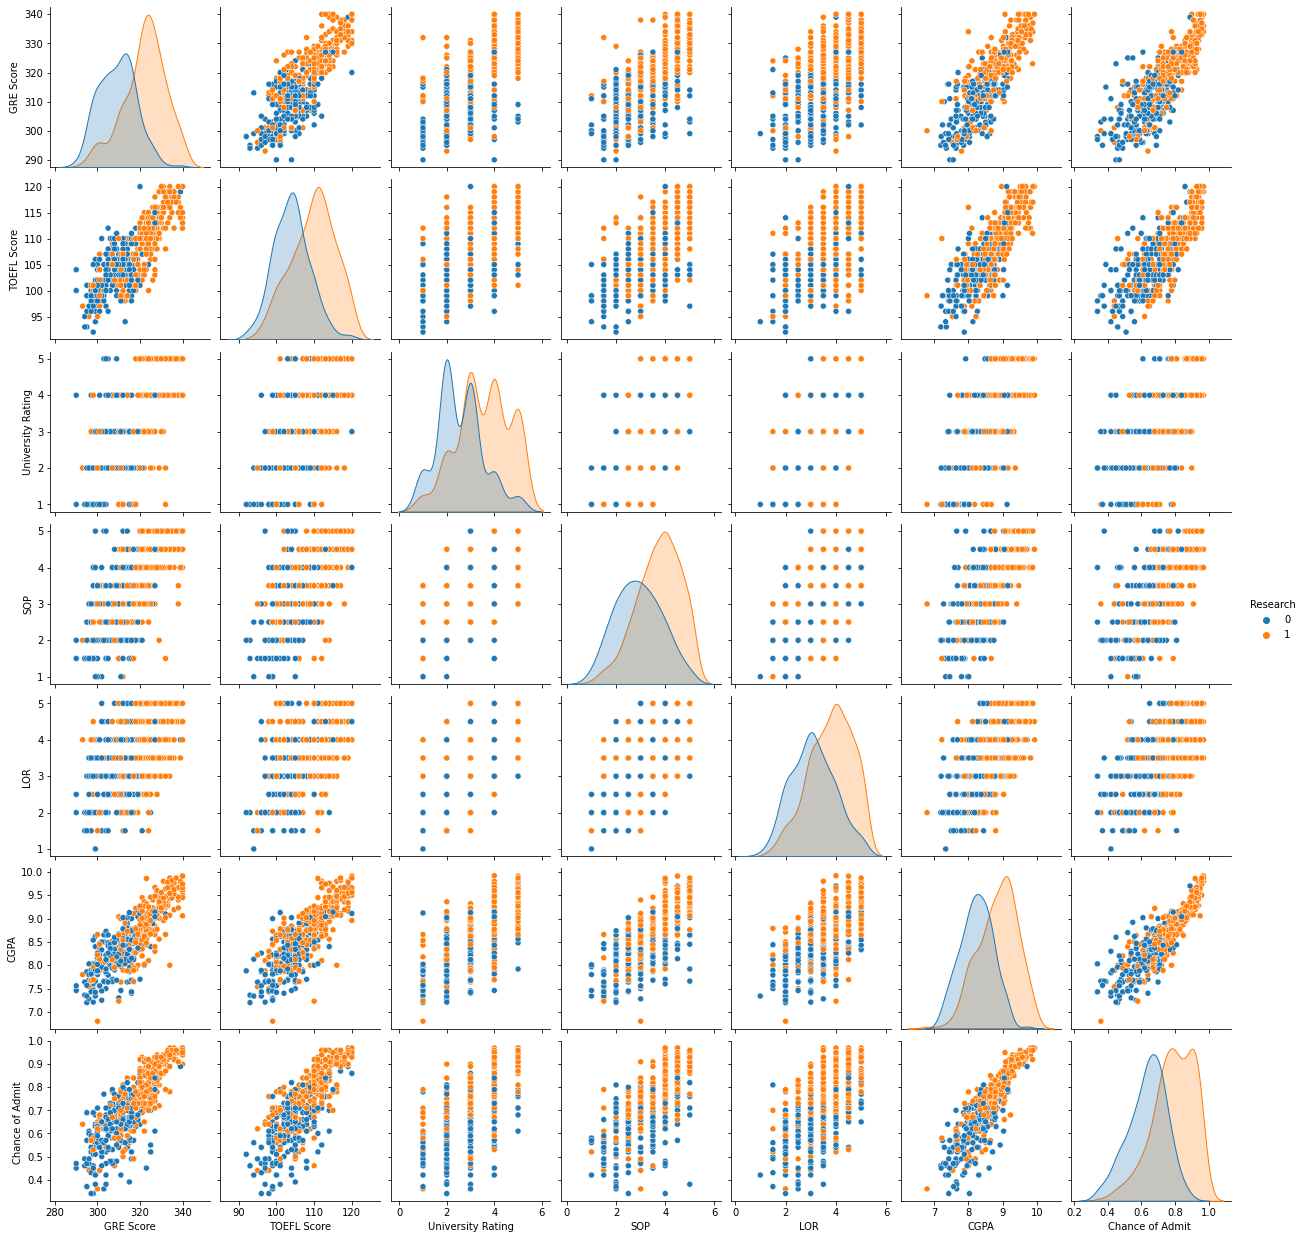

In [4]:
sns.pairplot(basic_addmision_df, hue="Research")

<h3> Building the Model </h3>

In [50]:
print(list(basic_addmision_df.columns))
X = basic_addmision_df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = basic_addmision_df[['Chance of Admit ']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [40]:
def rfr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')
    predictions = cross_val_predict(rfr, X_test, y_test, cv = 10)
    return scores, predictions

In [53]:
y_train = y_train.values.ravel()
scores, predictions = rfr_model(X_train, y_train)

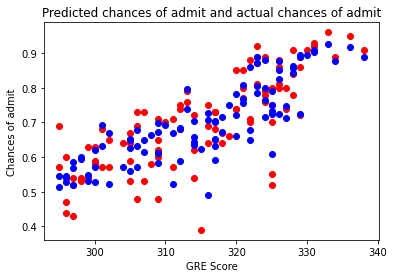

In [52]:
plt.scatter(X_test['GRE Score'], y_test, color = 'red')
plt.scatter(X_test['GRE Score'], predictions, color = 'blue')
plt.title('Predicted chances of admit and actual chances of admit')
plt.xlabel('GRE Score')
plt.ylabel('Chances of admit')
plt.show()

<h6> Need to work on visualization <br><br> Need to add read me <br><br> Need to add accuracy </h6>